In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dustinfeinberg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Sentimental Analysis

In [2]:
# Read API key 
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create news API key 
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch bitcoin news
bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show total number of news articles
bitcoin_news["totalResults"]

6485

In [5]:
# Eth news 
ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show totalnumber of news articles
ethereum_news["totalResults"]

2954

In [6]:
# Create bitcoin sentiment scores and complie in dataframe
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]

bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,When my wife started a little garden in our ur...,2021-08-06,-0.3400,0.000,0.061,0.939
1,PayPal will now allow users outside the U.S. t...,2021-08-23,0.4215,0.098,0.000,0.902
2,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,2021-08-10,0.4019,0.080,0.000,0.920
3,Retailers are increasingly accepting cryptocur...,2021-08-19,0.6187,0.153,0.000,0.847
4,"PayPal is bringing the ability to buy, hold an...",2021-08-23,0.6908,0.161,0.000,0.839


In [7]:
# Create eth sentiment scores and complie in dataframe
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
            pass
        
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame Columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902
2,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.0,1.000


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.162885,0.071100,0.033500,0.895400
std,0.447308,0.065972,0.068998,0.071897
min,-0.886000,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.138950,0.066500,0.000000,0.904500
75%,0.525925,0.108250,0.043000,0.924750
max,0.718400,0.200000,0.271000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.138720,0.059850,0.026400,0.913700
std,0.394769,0.061361,0.072668,0.078868
min,-0.893400,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.863250
50%,0.226300,0.053000,0.000000,0.922500
75%,0.426225,0.095000,0.000000,0.967750
max,0.695600,0.190000,0.312000,1.000000


In [48]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)
btc_negative_max=round(bitcoin_df.negative.max(),3)
eth_negative_max=round(ethereum_df.negative.max(),3)

## Highest Mean Positive Score

In [49]:
print(f"Bitcoin has a Mean Positive score of {btc_positive_mean}, which is notably higher when compared to Ethereum's Mean Positive score of {eth_positive_mean}")

Bitcoin has a Mean Positive score of 0.071, which is notably higher when compared to Ethereum's Mean Positive score of 0.06


## Highest Negative Score

In [51]:
print(f"Ethereum had the highest negative score of {eth_negative_max}, with bitcoin's highest negative score only coming in at {btc_negative_max}")

Ethereum had the highest negative score of 0.312, with bitcoin's highest negative score only coming in at 0.271


## Highest Positive Score

In [53]:
print(f"Bitcoin had the highest positive score of {btc_positive_max}, with ethereum's highest positive score only coming in shy at {eth_positive_max}")

Bitcoin had the highest positive score of 0.2, with ethereum's highest positive score only coming in shy at 0.19


## NLP

In [12]:
# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer

In [13]:
# Expand default stopwords
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char', 'also', 'reutersado'}

In [14]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

In [54]:
# Finish tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
     # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
      # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw, words))
       # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [55]:
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)

In [56]:
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,When my wife started a little garden in our ur...,2021-08-06,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,PayPal will now allow users outside the U.S. t...,2021-08-23,0.4215,0.098,0.000,0.902,"[PayPal, allow, user, outside, U.S., buy, hold..."
2,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,2021-08-10,0.4019,0.080,0.000,0.920,"[Photo, Joe, Raedle/Getty, Images, Twitter, Sq..."
3,Retailers are increasingly accepting cryptocur...,2021-08-19,0.6187,0.153,0.000,0.847,"[Retailers, increasingly, accepting, cryptocur..."
4,"PayPal is bringing the ability to buy, hold an...",2021-08-23,0.6908,0.161,0.000,0.839,"[PayPal, bringing, ability, buy, hold, sell, c..."


In [57]:
# Compile list of lists for btc articles
btc_word_tokenized = []
for text in bitcoin_df.text:
    # Create a list of tokenized words for each article
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the btc_word_tokenized list of lists
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

[['wife', 'started', 'little', 'garden', 'urban', 'backyard', 'could', 'think', 'worm', 'Also', 'bug', 'dirt', 'course', 'filled', 'worm', 'bug', 'composted', 'corn', 'cobs.…', '+3499', 'char'], ['PayPal', 'allow', 'user', 'outside', 'U.S.', 'buy', 'hold', 'sell', 'cryptocurrency', 'first', 'time', 'company', 'announced', 'today', 'launch', 'new', 'service', 'allow', 'customer', 'U.K.', '…', '+4420', 'char'], ['Photo', 'Joe', 'Raedle/Getty', 'Images', 'Twitter', 'Square', 'CEO', 'Jack', 'Dorsey', 'noted', 'superfan', 'Bitcoin', 'claimed', 'Monday', 'cryptocurrency', 'eventually', 'unite', 'world', 'Yes', 'really', 'Mond…', '+2119', 'char'], ['Retailers', 'increasingly', 'accepting', 'cryptocurrency', 'physical', 'item', 'know', 'spend', 'crypto', 'ephemeral', 'experience', 'like', 'travel', 'cryptocurrency', 'holder', 'indicate', 'willi…', '+2783', 'char'], ['PayPal', 'bringing', 'ability', 'buy', 'hold', 'sell', 'cryptocurrencies', 'across', 'side', 'pond', 'better', 'part', 'year', '

In [58]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,When my wife started a little garden in our ur...,2021-08-06,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,PayPal will now allow users outside the U.S. t...,2021-08-23,0.4215,0.098,0.000,0.902,"[PayPal, allow, user, outside, U.S., buy, hold..."
2,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,2021-08-10,0.4019,0.080,0.000,0.920,"[Photo, Joe, Raedle/Getty, Images, Twitter, Sq..."
3,Retailers are increasingly accepting cryptocur...,2021-08-19,0.6187,0.153,0.000,0.847,"[Retailers, increasingly, accepting, cryptocur..."
4,"PayPal is bringing the ability to buy, hold an...",2021-08-23,0.6908,0.161,0.000,0.839,"[PayPal, bringing, ability, buy, hold, sell, c..."


In [59]:
# Compile the list of lists of tokens for each eth article
eth_word_tokenized = []
for text in ethereum_df.text:
    # Create a list of tokenized words for each article
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the eth)word_tokenized list of lists
    eth_word_tokenized.append(words)
print(eth_word_tokenized)

[['Cent', 'founded', '2017', 'ad-free', 'creator', 'network', 'allows', 'user', 'offer', 'crypto', 'reward', 'good', 'post', 'comment', '—', '’', 'like', 'gifting', 'award', 'Reddit', 'Ethereum', 'in…', '+6228', 'char'], ['PayPal', 'allow', 'user', 'outside', 'U.S.', 'buy', 'hold', 'sell', 'cryptocurrency', 'first', 'time', 'company', 'announced', 'today', 'launch', 'new', 'service', 'allow', 'customer', 'U.K.', '…', '+4420', 'char'], ['PayPal', 'bringing', 'ability', 'buy', 'hold', 'sell', 'cryptocurrencies', 'across', 'side', 'pond', 'better', 'part', 'year', 'launched', 'US', 'statement', 'company', 'said', 'tha…', '+850', 'char'], ['bell', 'today', 'Coinbase', 'reported', 'another', 'period', 'impressive', 'result', 'second', 'quarter', 'earnings', 'report', 'quarter', 'Coinbase', '’', 'total', 'revenue', 'reached', '2.23', 'billion', 'helped', 't…', '+4900', 'char'], ['Representation', 'Ethereum', 'virtual', 'currency', 'standing', 'PC', 'motherboard', 'seen', 'illustration', 'pic

In [60]:
# Create a new tokens column for eth
ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810,"[Cent, founded, 2017, ad-free, creator, networ..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,"[PayPal, allow, user, outside, U.S., buy, hold..."
2,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,"[PayPal, bringing, ability, buy, hold, sell, c..."
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861,"[bell, today, Coinbase, reported, another, per..."
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.0,1.000,"[Representation, Ethereum, virtual, currency, ..."


## NGrames and Frequency Analysis

In [61]:
from collections import Counter
from nltk import ngrams

In [62]:
# Create a flat list of Bitcoin tokenized words from a list of lists
btc_flat_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
print(btc_flat_word_tokenized_list)

['wife', 'started', 'little', 'garden', 'urban', 'backyard', 'could', 'think', 'worm', 'Also', 'bug', 'dirt', 'course', 'filled', 'worm', 'bug', 'composted', 'corn', 'cobs.…', '+3499', 'char', 'PayPal', 'allow', 'user', 'outside', 'U.S.', 'buy', 'hold', 'sell', 'cryptocurrency', 'first', 'time', 'company', 'announced', 'today', 'launch', 'new', 'service', 'allow', 'customer', 'U.K.', '…', '+4420', 'char', 'Photo', 'Joe', 'Raedle/Getty', 'Images', 'Twitter', 'Square', 'CEO', 'Jack', 'Dorsey', 'noted', 'superfan', 'Bitcoin', 'claimed', 'Monday', 'cryptocurrency', 'eventually', 'unite', 'world', 'Yes', 'really', 'Mond…', '+2119', 'char', 'Retailers', 'increasingly', 'accepting', 'cryptocurrency', 'physical', 'item', 'know', 'spend', 'crypto', 'ephemeral', 'experience', 'like', 'travel', 'cryptocurrency', 'holder', 'indicate', 'willi…', '+2783', 'char', 'PayPal', 'bringing', 'ability', 'buy', 'hold', 'sell', 'cryptocurrencies', 'across', 'side', 'pond', 'better', 'part', 'year', 'launched'

In [63]:
# Generate the Bitcoin N-Grames where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'Also'): 1, ('Also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cobs.…'): 1, ('cobs.…', '+3499'): 1, ('+3499', 'char'): 1, ('char', 'PayPal'): 4, ('PayPal', 'allow'): 2, ('allow', 'user'): 2, ('user', 'outside'): 1, ('outside', 'U.S.'): 1, ('U.S.', 'buy'): 1, ('buy', 'hold'): 3, ('hold', 'sell'): 3, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 3, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 2, ('customer', 'U.K.'): 1, ('U.K.', '…'): 1, ('…', '+4420'): 1, ('+442

In [64]:
# Create a flat list of eth tokenized words from a list of lists
eth_flat_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
print(eth_flat_word_tokenized_list)

['Cent', 'founded', '2017', 'ad-free', 'creator', 'network', 'allows', 'user', 'offer', 'crypto', 'reward', 'good', 'post', 'comment', '—', '’', 'like', 'gifting', 'award', 'Reddit', 'Ethereum', 'in…', '+6228', 'char', 'PayPal', 'allow', 'user', 'outside', 'U.S.', 'buy', 'hold', 'sell', 'cryptocurrency', 'first', 'time', 'company', 'announced', 'today', 'launch', 'new', 'service', 'allow', 'customer', 'U.K.', '…', '+4420', 'char', 'PayPal', 'bringing', 'ability', 'buy', 'hold', 'sell', 'cryptocurrencies', 'across', 'side', 'pond', 'better', 'part', 'year', 'launched', 'US', 'statement', 'company', 'said', 'tha…', '+850', 'char', 'bell', 'today', 'Coinbase', 'reported', 'another', 'period', 'impressive', 'result', 'second', 'quarter', 'earnings', 'report', 'quarter', 'Coinbase', '’', 'total', 'revenue', 'reached', '2.23', 'billion', 'helped', 't…', '+4900', 'char', 'Representation', 'Ethereum', 'virtual', 'currency', 'standing', 'PC', 'motherboard', 'seen', 'illustration', 'picture', 'F

In [65]:
# Generate eth N-grams where N=2
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n =2))
print(dict(eth_n_gram_counts))

{('Cent', 'founded'): 1, ('founded', '2017'): 1, ('2017', 'ad-free'): 1, ('ad-free', 'creator'): 1, ('creator', 'network'): 1, ('network', 'allows'): 1, ('allows', 'user'): 1, ('user', 'offer'): 1, ('offer', 'crypto'): 1, ('crypto', 'reward'): 1, ('reward', 'good'): 1, ('good', 'post'): 1, ('post', 'comment'): 1, ('comment', '—'): 1, ('—', '’'): 1, ('’', 'like'): 1, ('like', 'gifting'): 1, ('gifting', 'award'): 1, ('award', 'Reddit'): 1, ('Reddit', 'Ethereum'): 1, ('Ethereum', 'in…'): 1, ('in…', '+6228'): 1, ('+6228', 'char'): 1, ('char', 'PayPal'): 3, ('PayPal', 'allow'): 1, ('allow', 'user'): 1, ('user', 'outside'): 1, ('outside', 'U.S.'): 1, ('U.S.', 'buy'): 1, ('buy', 'hold'): 2, ('hold', 'sell'): 2, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 2, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 1, (

In [66]:
# Use the token_count function to generate the top 10 words from each coin
def word_counter(coin_token_list):
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [67]:
# Get top 10 words for btc
word_counter(btc_flat_word_tokenized_list)

,word,count
0,char,20
1,cryptocurrency,10
2,first,8
3,Bitcoin,8
4,'s,6
5,PayPal,5
6,customer,5
7,Reuters,5
8,allow,4
9,'',4


In [68]:
# Get top 10 words for eth
word_counter(eth_flat_word_tokenized_list)

,word,count
0,char,20
1,Ethereum,9
2,cryptocurrency,7
3,…,6
4,Reuters,5
5,ethereum,5
6,crypto,4
7,PayPal,4
8,ether,4
9,network,3


## Word Clouds

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [70]:
# Convert list of tokens into a single btc string
btc_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list])
print(btc_string)

wife started little garden urban backyard could think worm Also bug dirt course filled worm bug composted corn cobs.… +3499 char PayPal allow user outside U.S. buy hold sell cryptocurrency first time company announced today launch new service allow customer U.K. … +4420 char Photo Joe Raedle/Getty Images Twitter Square CEO Jack Dorsey noted superfan Bitcoin claimed Monday cryptocurrency eventually unite world Yes really Mond… +2119 char Retailers increasingly accepting cryptocurrency physical item know spend crypto ephemeral experience like travel cryptocurrency holder indicate willi… +2783 char PayPal bringing ability buy hold sell cryptocurrencies across side pond better part year launched US statement company said tha… +850 char Joe TidyCyber reporter Taxi driver Chris obsessively checking phone update `` 'm set lose almost 2,500 euro £2,100 worth cryptocurrency coin '' say Chris describes hi… +6584 char Joe TidyCyber reporter '' Follow money '' generation 's mantra investigator loo

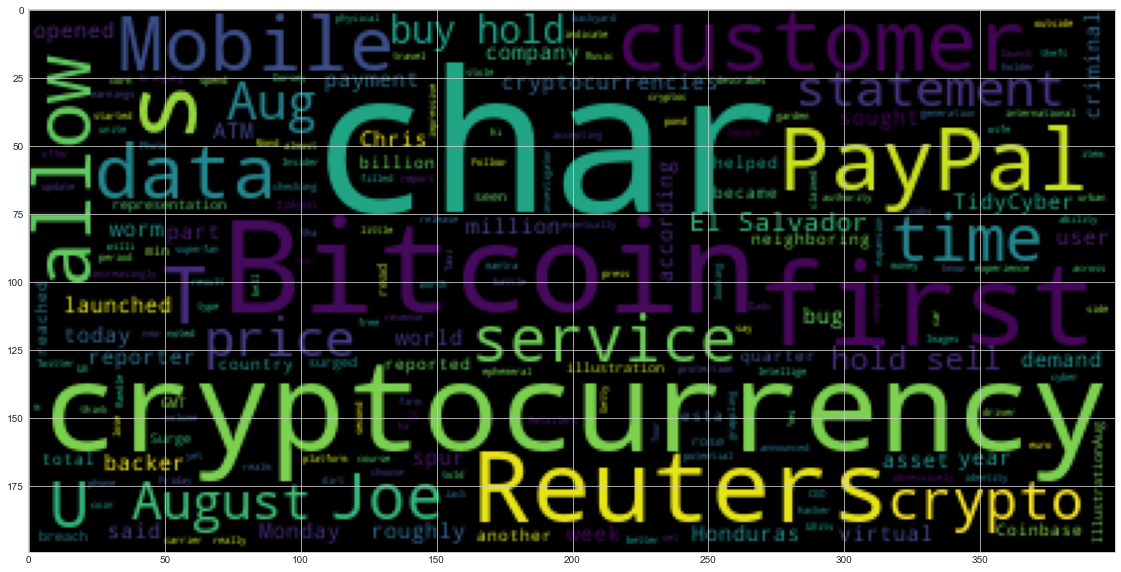

In [71]:
# Generate btc word cloud
btc_word_cloud = WordCloud().generate(btc_string)
plt.imshow(btc_word_cloud)

In [72]:
# Convert list of tokens into a single eth string
eth_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list])
print(eth_string)

wife started little garden urban backyard could think worm Also bug dirt course filled worm bug composted corn cobs.… +3499 char PayPal allow user outside U.S. buy hold sell cryptocurrency first time company announced today launch new service allow customer U.K. … +4420 char Photo Joe Raedle/Getty Images Twitter Square CEO Jack Dorsey noted superfan Bitcoin claimed Monday cryptocurrency eventually unite world Yes really Mond… +2119 char Retailers increasingly accepting cryptocurrency physical item know spend crypto ephemeral experience like travel cryptocurrency holder indicate willi… +2783 char PayPal bringing ability buy hold sell cryptocurrencies across side pond better part year launched US statement company said tha… +850 char Joe TidyCyber reporter Taxi driver Chris obsessively checking phone update `` 'm set lose almost 2,500 euro £2,100 worth cryptocurrency coin '' say Chris describes hi… +6584 char Joe TidyCyber reporter '' Follow money '' generation 's mantra investigator loo

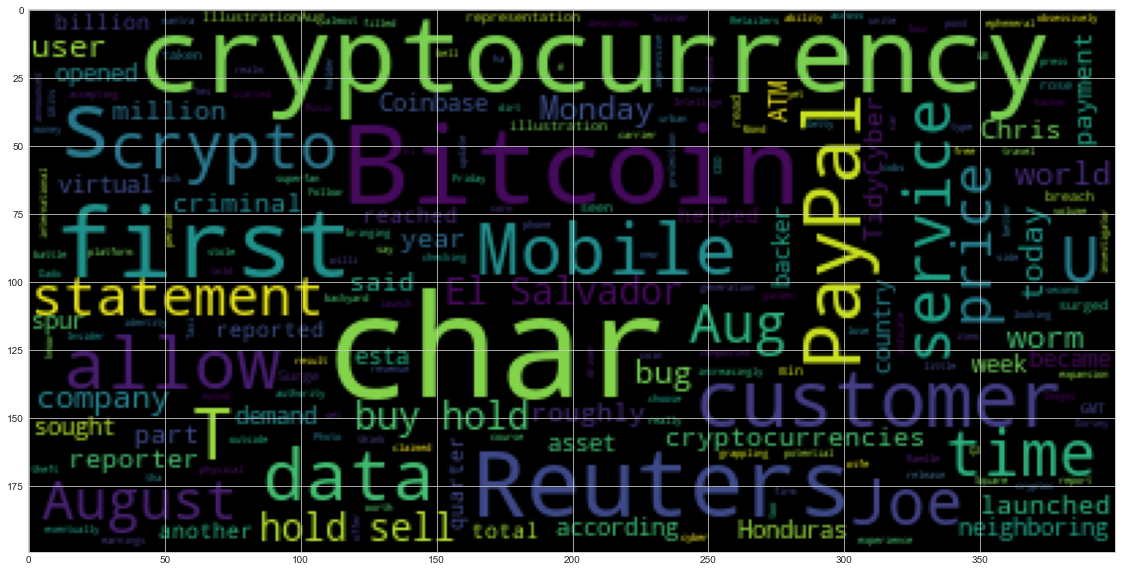

In [73]:
# Generate eth word cloud
eth_word_cloud = WordCloud().generate(eth_string)
plt.imshow(eth_word_cloud)

## Named Entity Recognition

In [74]:
import spacy 
from spacy import displacy

In [75]:
# Load spaCy model
ner = spacy.load('en_core_web_sm')

## BTC Named Entity Recoginition

In [76]:
# Concantenate bitcoin text together
# Compule list of lists of texts extracted from btc articles
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)
    
# Convert list of texts into single string
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] Photo by Joe Raedle/Getty Images

 

 Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.
On Mond… [+2119 chars] Retailers are increasingly accepting cryptocurrency for physical items, but did you know you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars] PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after i

In [77]:
# Run NER process on text
btc_document = ner(btc_text_string)

In [78]:
# Provide title to document
btc_document.user_data["title"] = "Bitcoin Named Entity Recognition"

In [79]:
# Render visual
displacy.render(btc_document, style='ent')

In [80]:
# List entities 
# Get geopolitical and organizational entities
btc_entities = [ent.text for ent in btc_document.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

['U.S.', 'U.K.', 'US', 'UK', 'T-Mobile', 'Reuters', 'ATM', 'Honduras', 'El Salvador', 'Coinbase', 'Reuters', 'ATM', 'Honduras', 'El Salvador', 'REUTERS', 'Reuters', 'PennyStocksBitcoin Price Surge Helped Boost', 'Bitcoin, Dogecoin', 'Ethereum', 'T-Mobile', 'REUTERS', 'Reuters', 'LONDON', 'Reuters', 'Entrepreneur', 'El Salvador’s', 'Bitcoin\xa0']


## ETH Named Entity Recoginition

In [81]:
# Concantenate ethereum text together
# Compule list of lists of texts extracted from btc articles
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)
    
# Convert list of texts into single string
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after it launched in the US. In a statement, the company said tha… [+850 chars] After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.
During the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars] Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS

In [82]:
# Run NER process on text
eth_document = ner(eth_text_string)

In [83]:
# Provide title to document
eth_document.user_data["title"] = "Ethereum Named Entity Recognition"

In [84]:
# Render visual
displacy.render(eth_document, style='ent')

In [85]:
# List entities 
# Get geopolitical and organizational entities
eth_entities = [ent.text for ent in eth_document.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

['U.S.', 'U.K.', 'US', 'Coinbase', 'REUTERS', 'Reuters', 'Poly Network', 'HONG KONG', 'Reuters', 'REUTERS', 'Reuters', 'TechCrunch Disrupt London 2015', 'Getty Images\r\nCitigroup', 'BBC News', 'LONDON', 'Reuters', 'REUTERS', 'Reuters', 'Reuters', 'VanEck', 'the US Securities and Exchange Commission', 'Poly Network']
